In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn #missingno had to be installed 'pip install missingno' 
import math
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.linear_model import LassoCV
from scipy import stats
%matplotlib inline

# Initial Observations 

In [2]:
train = pd.read_csv('train.csv')
#sample = pd.read_csv('sample_submission.csv') not useful


In [3]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [4]:
train #what do we have? 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# let's start looking at the data, print out colname, type, 

#[print("{} {}".format(col, type(test[col][1]))) for col in columns]

#df.dtypes is much easier way to doing this

train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


# Data breakdown. splitting via int vs object data types 

In [6]:
#split the int and float class from the str classes 

intCols = train.columns[(train.dtypes == 'int64')| (train.dtypes == 'float64')]
strCols = train.columns[train.dtypes == 'object']


In [7]:
dfInt = train[intCols]

In [8]:
dfInt.shape

(1460, 38)

In [9]:
dfStr = train[strCols]

In [10]:
dfStr.shape # we screwed up a bit, we should convert all floats to ints first # fixed this by including float64 to boolean filter

(1460, 43)

In [11]:
dfInt.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Converting sale to LogSale
   

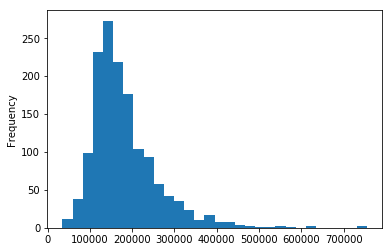

In [12]:
#taking a look at sale price 
train.SalePrice.plot.hist(bins = 30)

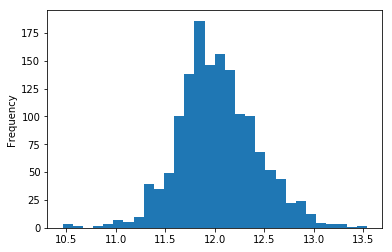

In [13]:
#hist of log of sales price 
train.SalePrice.apply(lambda x: math.log(x)).plot.hist(bins = 30)

# looking at missingness

In [14]:
# let's start sorting out some missingness starting with Int data
nulls = train.isnull().sum()

In [15]:
nulls = pd.DataFrame(nulls)

In [16]:
nulls = nulls.reset_index()


In [17]:
nulls.columns = ['feature', 'nulls']
nulls

,feature,nulls
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
5,Street,0
6,Alley,1369
7,LotShape,0
8,LandContour,0
9,Utilities,0


In [18]:
trainNulls = nulls.loc[nulls.nulls != 0] # short list of colnames with nuls  
trainNulls 

,feature,nulls
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [19]:
#making a test training set by dropping all cols with null values 

In [20]:
dfInt.LotFrontage.describe() #where are the missing datas? 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [21]:
#let's also take a count of how many fields are zeros. may also be missing data
#lots of points are 0 
#nulls = []
#for col in intCols:
    #print((col, sum(dfInt[col] == 0)))
    

In [22]:
trainNulls.feature.values

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

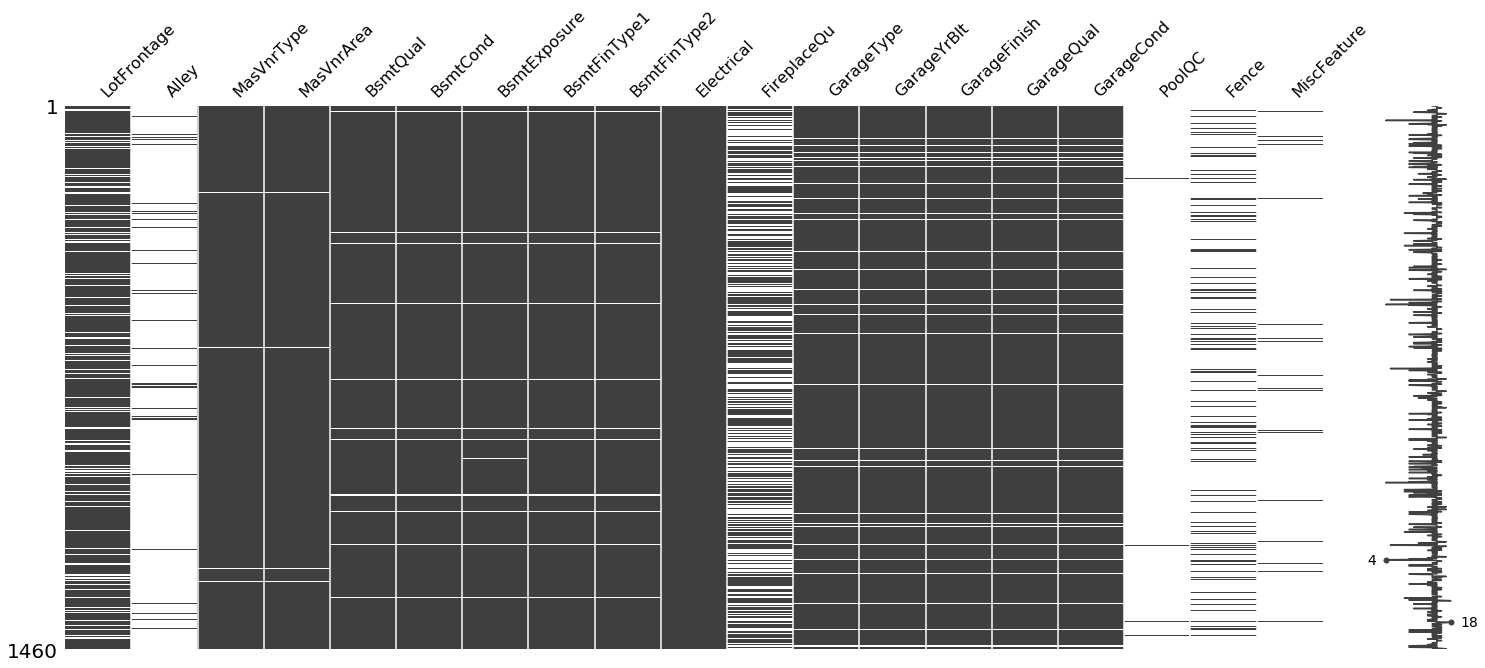

In [23]:

mn.matrix(train[trainNulls.feature.values])
# visualization of missingness in dataset. 
# Alley is mostly missing, as is poolQC,Fence, and MiscFeatures. Fireplace Quality is also 50/50
# Lot frontage is missing a significant amount and not sure if we can find a way to impute it's missingness 
# Garage missingness is likely due to lack of garage. impute these with 0? or none 
# let's observe this some more. maybe those don't have a lot. also read description 
# LotFrontage is "linear ft of street connected to property. This is probably related to sqft of 1st floor in some geometric relationship

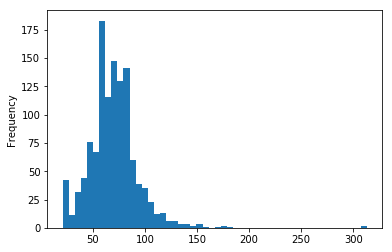

In [24]:
train.LotFrontage.plot.hist(bins = 50)

In [25]:
train.corr().LotFrontage.sort_values(ascending = False)
# some correlation between 1stflrSF, maybe we can impute based on this 

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
Id              -0.010601
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFro

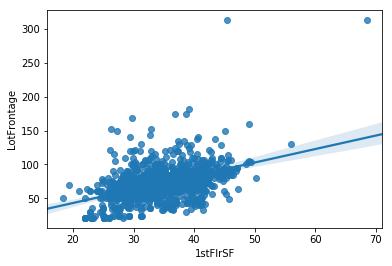

In [26]:
# train['1stFlrSF'].apply(math.sqrt)
# here we graph sqrt of first floor SF to lot frontage.
# much more linearity here. I think we can impute from first floor SF. 

sns.regplot(x = train['1stFlrSF'].apply(math.sqrt), y = train['LotFrontage'])


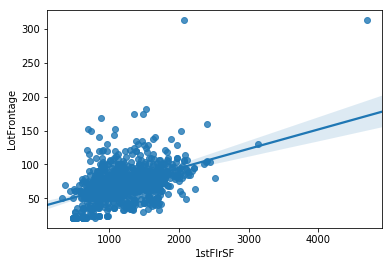

In [27]:
sns.regplot(x = train['1stFlrSF'], y = train['LotFrontage'])

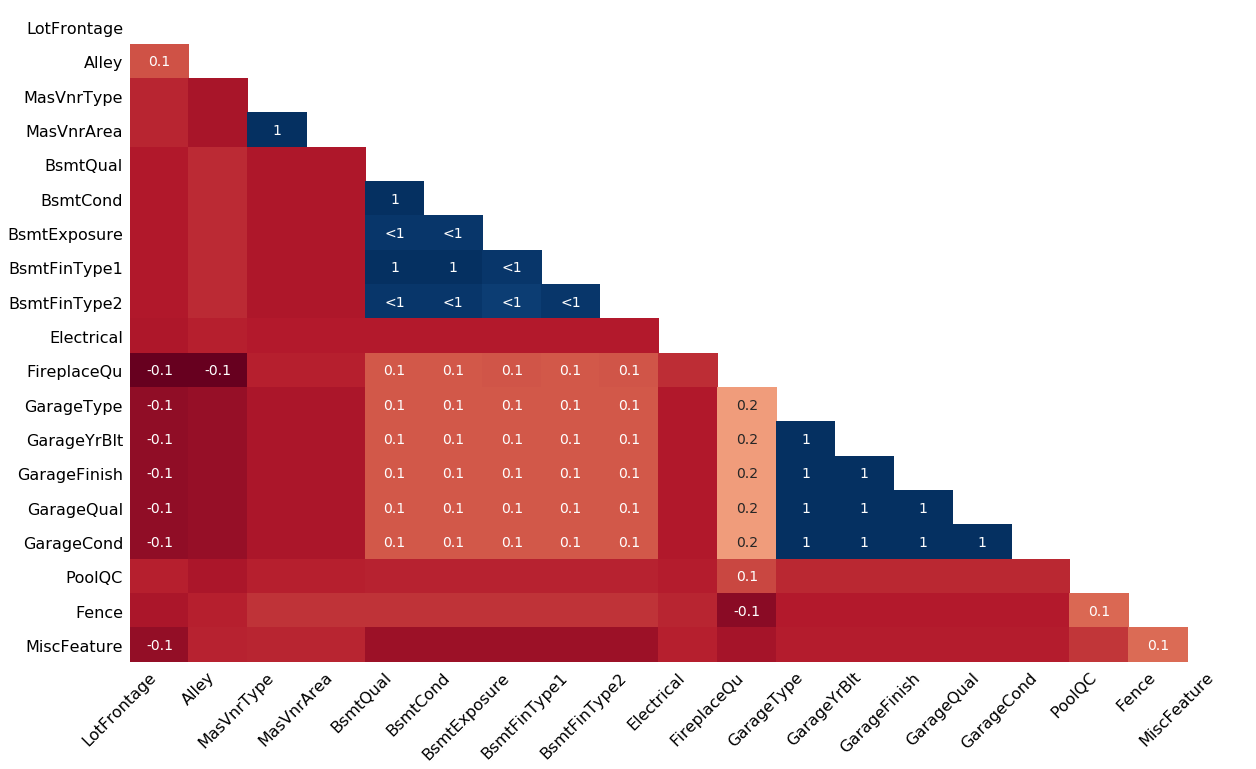

In [28]:
mn.heatmap(train)

# making bins of sales price for visualizing categories 

In [29]:
#creating category bins for sales price 
dfInt.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [30]:
from scipy.stats import binned_statistic

data = dfInt.SalePrice
bin_means = binned_statistic(data, data)[0]

In [31]:
bin_means

array([  86214.08108108,  142361.5560166 ,  208531.19571046,
        281972.4       ,  354766.1372549 ,  425545.57894737,
        499959.25      ,  564838.        ,  618328.5       ,  750000.        ])

In [32]:
np.histogram(dfInt.SalePrice.apply(lambda x: math.log(x)))[1] #histogram of log values. should probably make a separate column of log sales

array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
        11.68993448,  11.99735757,  12.30478066,  12.61220375,
        12.91962684,  13.22704994,  13.53447303])

In [33]:
#making column of log sales
LogSale = dfInt.SalePrice.apply(lambda x: math.log(x))
#append to train data
train['LogSale'] = LogSale
dfInt['LogSale'] = LogSale

C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [34]:
dfInt.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSale'],
      dtype='object')

(array([  5,  12,  54, 184, 470, 400, 220,  90,  19,   6], dtype=int64), array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
        11.68993448,  11.99735757,  12.30478066,  12.61220375,
        12.91962684,  13.22704994,  13.53447303]))
1460


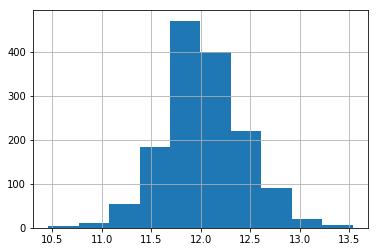

In [35]:
bins = np.histogram(dfInt.LogSale)[1]
bins #creating bins of sales used to help visualize 
train.LogSale.hist() #visualize 
print(np.histogram(train.LogSale)) #print out dist in count and log sale 
print(sum(np.histogram(train.LogSale)[0])) #checking to see if we missed anything

In [36]:
trial = np.digitize(dfInt.LogSale, bins = bins) #selecting bin value according to LogSales

In [37]:
dfInt['SaleBin'] = trial
dfStr['SaleBin'] = trial
train['SaleBin'] = trial

C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
# using stats.crosstab to set up data for visualization 

Zones = pd.crosstab(train.SaleBin, train.MSZoning, margins = True, normalize = 'index')
Zones

MSZoning,C (all),FV,RH,RL,RM
SaleBin,,,,,
1,0.600000,0.000000,0.000000,0.200000,0.200000
2,0.083333,0.000000,0.000000,0.583333,0.333333
3,0.055556,0.000000,0.055556,0.407407,0.481481
4,0.010870,0.000000,0.010870,0.586957,0.391304
5,0.002128,0.017021,0.019149,0.759574,0.202128
6,0.000000,0.077500,0.005000,0.887500,0.030000
7,0.000000,0.090909,0.000000,0.886364,0.022727
8,0.000000,0.066667,0.000000,0.911111,0.022222
9,0.000000,0.000000,0.000000,0.947368,0.052632


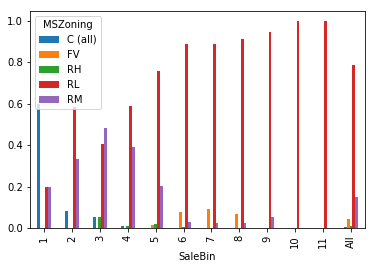

In [39]:
Zones.plot.bar()

In [40]:
# made summary of means in each bin. 
salegroup = train.groupby('SaleBin')
summaryMean = salegroup.agg(['mean'])
summaryMean # since we used mean, it only returns int columns 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogSale
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
SaleBin,,,,,,,,,,,,,,,,,,,,,
1,589.400000,38.000000,52.000000,7260.800000,2.800000,4.200000,1929.000000,1950.000000,0.000000,109.000000,...,115.400000,57.400000,0.000000,0.000000,0.000000,0.000000,6.800000,2007.800000,37482.200000,10.530103
2,891.333333,40.833333,66.272727,7300.000000,3.500000,4.166667,1935.166667,1961.250000,0.000000,116.333333,...,1.666667,36.000000,0.000000,0.000000,0.000000,296.166667,5.083333,2008.666667,58073.000000,10.967325
3,666.962963,68.425926,54.687500,7017.870370,4.444444,4.962963,1940.648148,1965.259259,25.500000,135.055556,...,9.759259,46.537037,0.000000,0.000000,0.000000,37.222222,6.203704,2008.037037,80620.370370,11.295032
4,719.967391,57.608696,59.530488,7879.739130,4.880435,5.663043,1943.244565,1968.271739,32.646739,203.532609,...,24.413043,37.380435,0.000000,1.521739,0.000000,21.576087,6.195652,2007.826087,106652.010870,11.573655
5,750.263830,58.010638,66.406170,9147.253191,5.423404,5.897872,1960.802128,1977.980851,60.978723,442.119149,...,27.900000,26.595745,2.548936,13.323404,1.021277,61.234043,6.197872,2007.827660,140120.951064,11.846837
6,732.757500,60.650000,70.937908,10244.125000,6.435000,5.440000,1984.122500,1991.830000,99.512690,417.300000,...,54.807500,12.835000,5.065000,19.537500,3.060000,40.825000,6.227500,2007.805000,187018.027500,12.135439
7,741.768182,51.090909,80.732558,14024.427273,7.322727,5.472727,1990.609091,1998.268182,163.191781,540.263636,...,78.468182,14.777273,5.131818,24.045455,8.040909,40.227273,6.763636,2007.722727,251751.413636,12.432721
8,646.666667,46.500000,87.313253,16436.588889,8.311111,5.300000,1996.577778,2002.588889,304.900000,885.477778,...,84.200000,8.111111,6.944444,13.533333,0.000000,0.000000,7.033333,2007.822222,341283.322222,12.736623


In [41]:
#summaryMean.MasVnrArea.plot.bar()


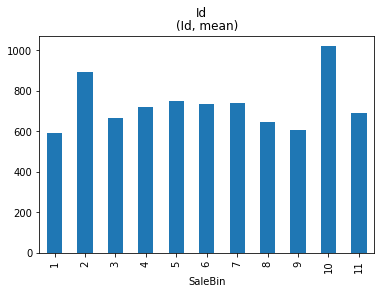

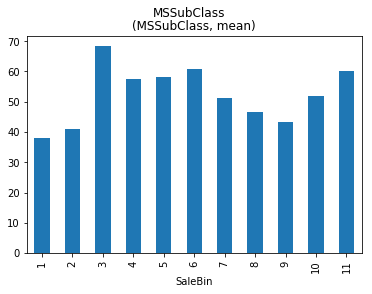

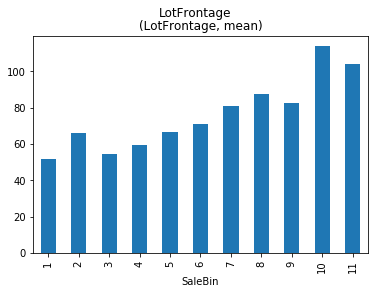

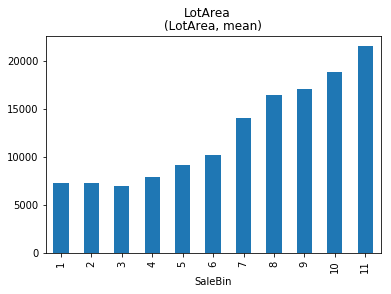

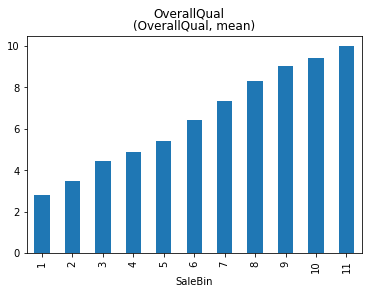

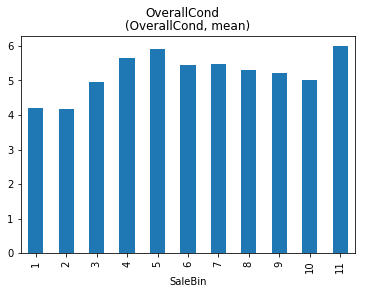

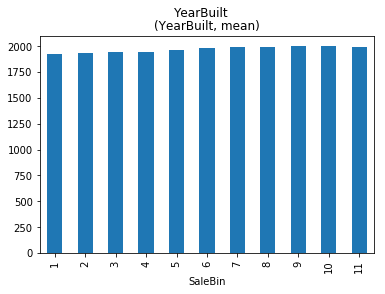

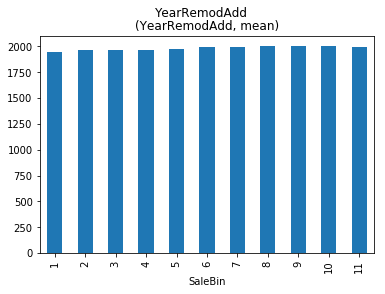

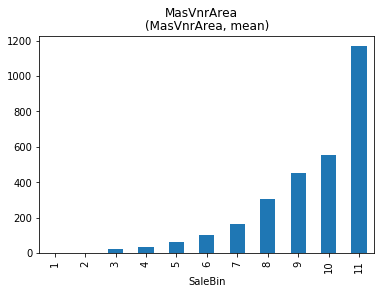

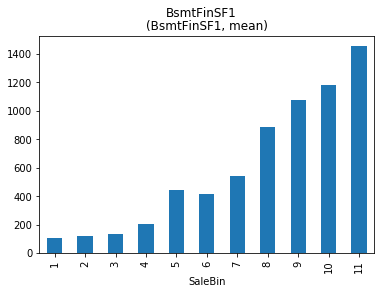

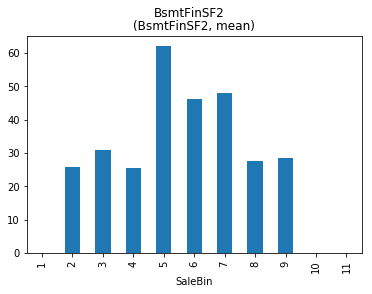

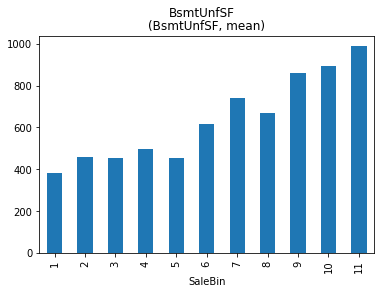

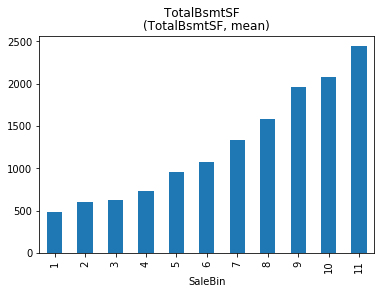

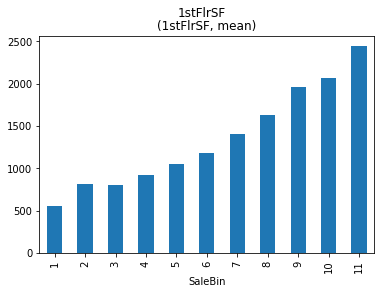

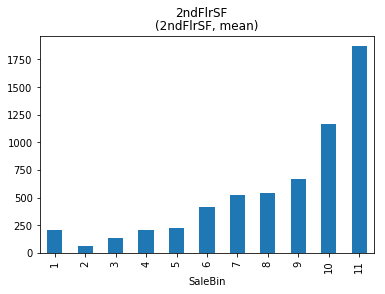

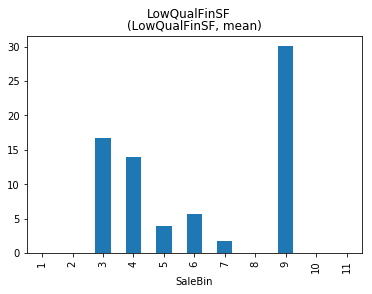

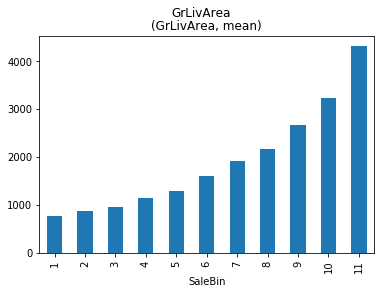

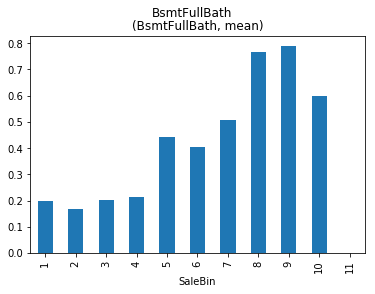

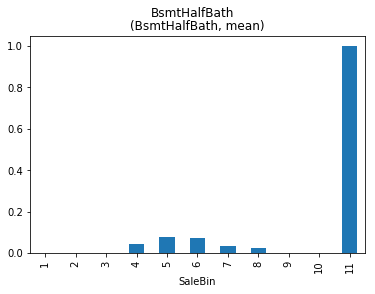

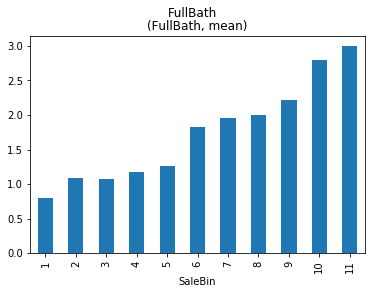

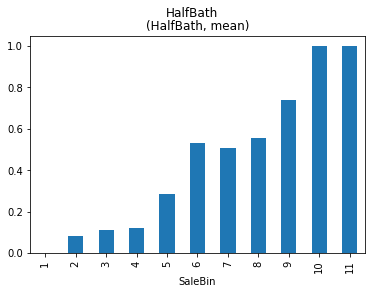

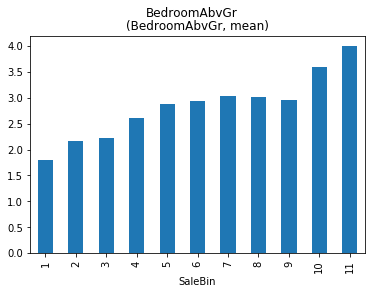

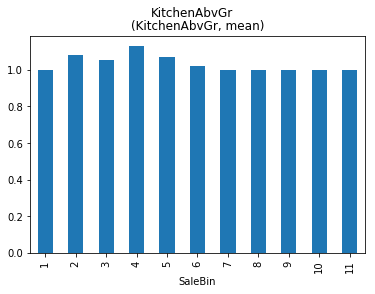

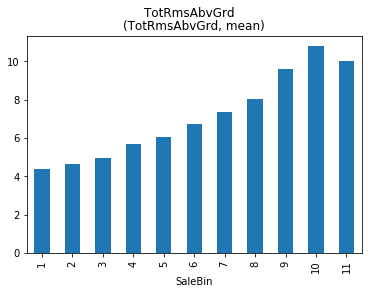

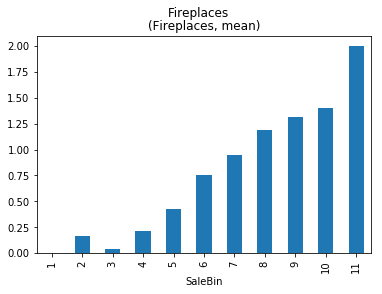

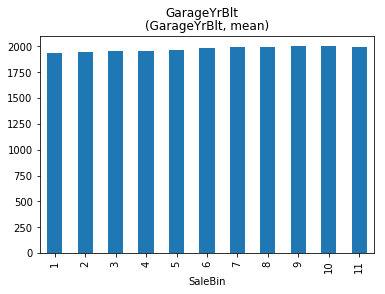

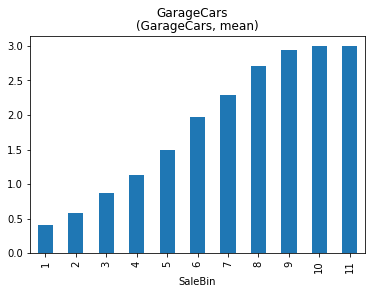

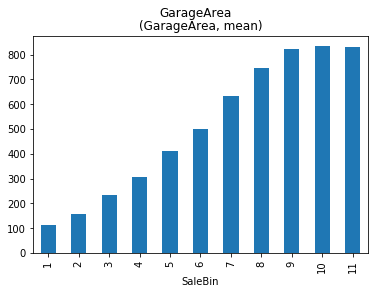

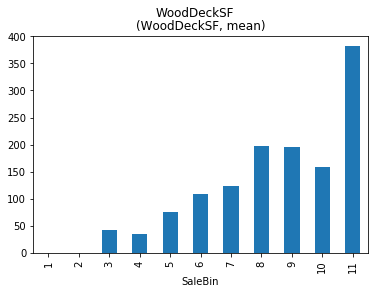

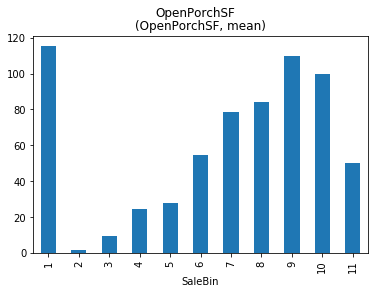

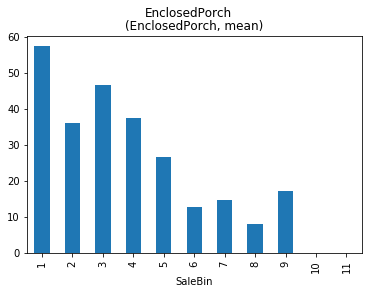

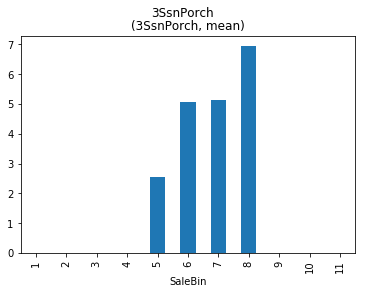

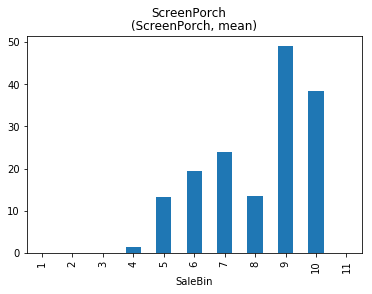

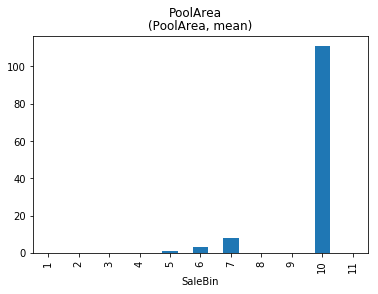

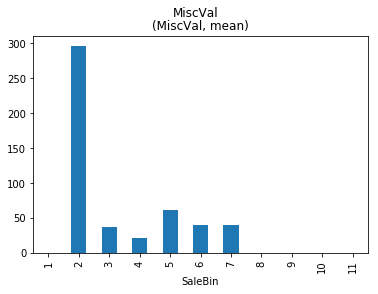

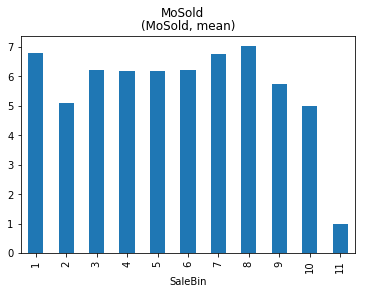

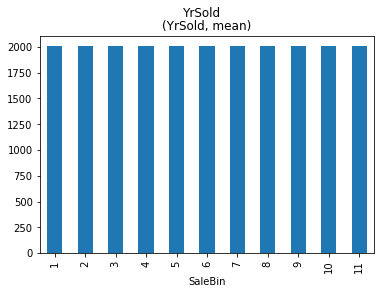

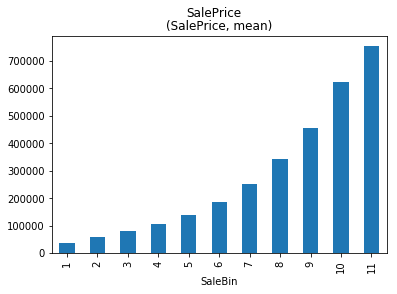

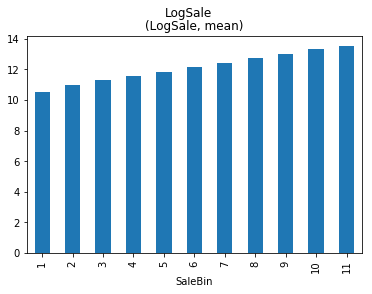

In [42]:
#crude bar plots to gain some feel for trends vs sales price
for each in summaryMean.columns:
    plt.show(summaryMean[each].plot(kind = 'bar', title = each[0], subplots = True))

In [43]:
#salegroup.agg('count')

In [44]:
dfStr.shape

(1460, 44)

# creating dummy variables for categorical features

In [45]:
#will have to give levels to categorical data 

In [46]:
dfStrDum = pd.get_dummies(dfStr)

In [47]:
dfStrDum.shape

(1460, 253)

In [48]:
trainDum = pd.get_dummies(train)
trainDum.shape 

(1460, 292)

# playing around with Feature selection via skLearn tools

In [49]:
# let's play around with some feature selection 
# following procedures in http://scikit-learn.org/stable/modules/feature_selection.html
# import some sklearn tools here
from sklearn.feature_selection import VarianceThreshold
# and set up our X and y's 
X = trainDum.drop(['SalePrice','LogSale', 'SaleBin', 'Id'], axis = 1)

## Variance threshold

In [50]:
# Variance threshhold
sel = VarianceThreshold(.8 * (1 - .8))
sel.fit_transform(X) #Nans in the way , spits out error 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# have to drop or impute some values 
trainNulls
# impute LotFrontage and drop the rest for now


In [51]:
train.LotFrInt = train.LotFrontage.interpolate() #interpolate missing data 

In [52]:
# now drop everythign else from train and call it new df

trainNoNull = train.drop(trainNulls.feature, axis = 1)

In [53]:
trainNoNull.isnull().sum().sum()
# confirm no nulls 
#let's try feature selections 

0

In [54]:
NoNullDum = pd.get_dummies(trainNoNull)
NoNullDum.shape
#Some dummies variables are all 0's 

(1460, 219)

In [55]:
# drop some of the sale dependent variables we created 
X = NoNullDum.drop(['SalePrice','LogSale', 'SaleBin'], axis = 1)


In [56]:
sel = VarianceThreshold(.8 * (1 - .8))
VarFeatures = sel.fit_transform(X) 

In [57]:
print(VarFeatures.shape) #cut it down to 49, but which ones? 
print(VarFeatures)

# note on removing low variance:is a simple baseline approach to feature selection. 
#It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, 
#i.e. features that have the same value in all samples. here we set it to 80%

(1460, 49)
[[    1    60  8450 ...,     0     1     0]
 [    2    20  9600 ...,     0     0     1]
 [    3    60 11250 ...,     0     1     0]
 ..., 
 [ 1458    70  9042 ...,     0     1     0]
 [ 1459    20  9717 ...,     0     1     0]
 [ 1460    20  9937 ...,     0     0     1]]


In [58]:
def VarianceThreshold_selector(data):
    columns = data.columns
    selector = VarianceThreshold(.8 * (1 - .8)) #modified with this selector parameter
    selector.fit_transform(data)
    labels = [columns[x] for x in selector.get_support(indices=True)]
    return pd.DataFrame(selector.fit_transform(data), columns=labels)

#pulled this def off stack overflow


In [59]:
columns = X.columns
selector = VarianceThreshold(.8)
selector.fit_transform(X)
labels = [columns[x] for x in selector.get_support(indices=True)]

In [60]:
selector.get_support(indices = True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 21, 24,
       25, 26, 27, 28, 29, 30, 31, 32, 33], dtype=int64)

In [61]:
VarianceSelection = VarianceThreshold_selector(X)
VarianceSelection.columns # variables selected via variance threshold

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_RL', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Inside', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'HeatingQC_Ex', 'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

## Selection with LassoCV

In [62]:
#Feature selection using Select from model 
# set up y
y = train.LogSale

# We use the base estimator Lasso since the L1 norm promotes sparsity of features.
clf = LassoCV(cv = 10) #instantiating LassoCV. CV will do an additional crossvalidation? Can combine this is k-fold technique for 
#nested CV? 3 was default

sfm = SelectFromModel(clf, threshold= None)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]


LassoFeatures = [X.columns[x] for x in selector.get_support(indices=True)]

In [63]:
sfm.transform(X)

array([[2003, 2003,  706, ...,  548,    0,    0],
       [1976, 1976,  978, ...,  460,  298,    0],
       [2001, 2002,  486, ...,  608,    0,    0],
       ..., 
       [1941, 2006,  275, ...,  252,    0,    0],
       [1950, 1996,   49, ...,  240,  366,    0],
       [1965, 1965,  830, ...,  276,  736,    0]], dtype=int64)

In [64]:
LassoFeatures = X.columns[sfm.get_support()]
LassoFeatures

# we can see selected Features here using model.get_support. only 9 features 
# these seem like strange parameters to judge on, why these? this requires more investigation 

Index(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'ScreenPorch'],
      dtype='object')

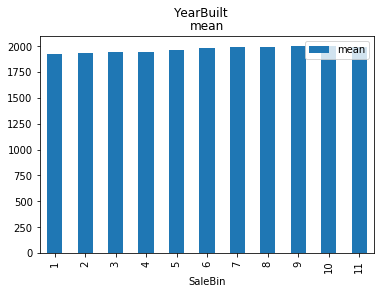

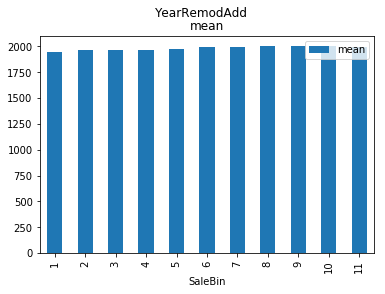

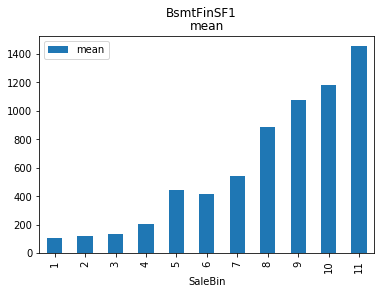

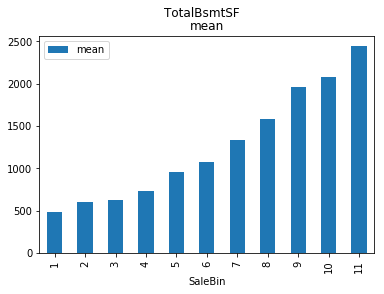

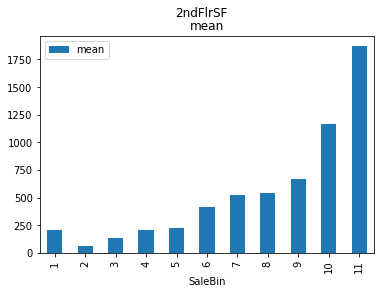

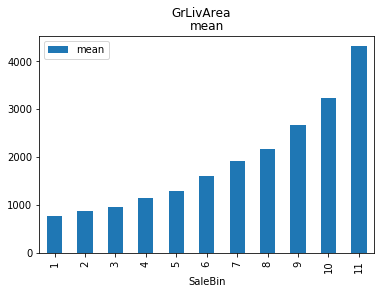

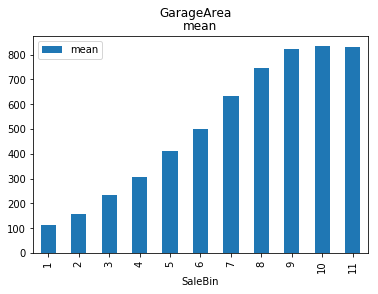

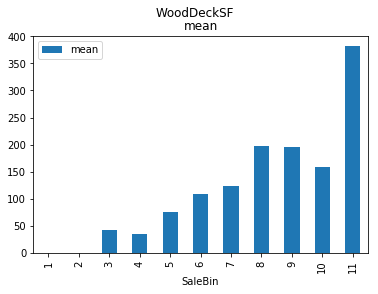

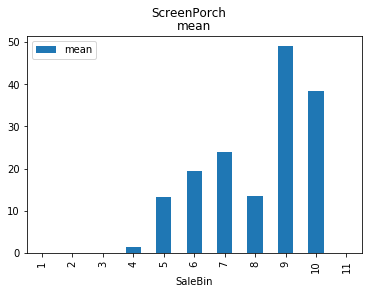

In [65]:
for each in LassoFeatures:
    plt.show(summaryMean[each].plot(kind = 'bar', title = each, subplots = True))

In [66]:
sfm.get_support

<bound method SelectorMixin.get_support of SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False),
        norm_order=1, prefit=False, threshold=None)>

## some k-folds testing 

In [67]:
#now we have a set of variables, I suspect many categorical variables have been cut

#let's try to get some accuracy estimates on a k-fold cv on this train data 

from sklearn.cross_validation import KFold, cross_val_score

cv_outer = KFold(len(X), n_folds = 10, shuffle = True) # setting up folding parameters

lasso = LassoCV()

scores = cross_val_score(lasso, X, y, cv = cv_outer)

C:\Users\Gardenia\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [68]:
scores #when we fed it all in it seems rather poor. i think this is right. let's try again for a cut features 

array([ 0.77851157,  0.70705649,  0.76039813,  0.76172519,  0.81888216,
        0.806395  ,  0.36010149,  0.82634717,  0.81316021,  0.84054332])

In [69]:
scores.mean()

0.74731207235946839

In [70]:
Xcut = X[LassoFeatures]

In [71]:
cutScores = cross_val_score(lasso, Xcut, y, cv = cv_outer)

In [72]:
cutScores #cutting the features down to those selected by lasso doesn't seem to help much

array([ 0.79117774,  0.72226424,  0.80652924,  0.79893395,  0.82413787,
        0.81823585,  0.42372703,  0.84076063,  0.82335642,  0.85212493])

In [73]:
cutScores.mean()

0.77012478942139062

In [74]:
X.shape

(1460, 216)

In [75]:
Xcut.shape

(1460, 9)

In [76]:
# compare and contrast feature selection methods. 
# univariate selection using ANOVA 

In [77]:
from sklearn.feature_selection import SelectPercentile, f_classif

In [78]:
selector = SelectPercentile(f_classif, percentile = 10)
selector.fit(X, y)
scores2 = -np.log10(selector.pvalues_)
#results return some inf values. hindering selection need to try to drop inf


C:\Users\Gardenia\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
allzeros = X[X.columns[scores2 == np.inf]].columns
#these are all the same and will be dropped from X
X = X[X.columns[scores2 != np.inf]]

In [81]:
X.shape

(1460, 210)

In [82]:
#try ANOVA feature selection again 
selector = SelectPercentile(f_classif, percentile = 50)
selector.fit(X, y)
scores2 = -np.log10(selector.pvalues_)

<Container object of 210 artists>

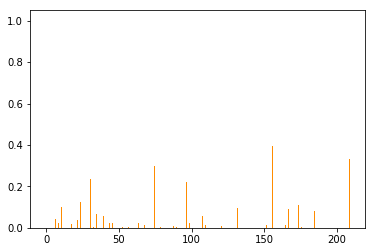

In [83]:
scores2 /= scores2.max()
scores2
X_indices = np.arange(X.shape[-1])
plt.bar(X_indices - .45, scores2, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [84]:
ANOVAscores = pd.DataFrame(list(zip(X.columns, scores2, selector.pvalues_)),\
                        columns = ['feature', 'score', 'p_value'])
ANOVAscores.sort_values('score', ascending = False)
#list of anovascores based on p_values to the -log10
#high scores = low pvalues 


,feature,score,p_value
206,SaleCondition_Alloca,1.000000e+00,2.160479e-291
156,ExterQual_Ex,3.950611e-01,1.477026e-115
3,OverallQual,3.917613e-01,1.344399e-114
201,SaleType_New,3.635909e-01,2.073362e-106
209,SaleCondition_Partial,3.335265e-01,1.135975e-97
75,Neighborhood_NridgHt,2.969649e-01,4.814748e-87
182,KitchenQual_Ex,2.429560e-01,2.404838e-71
31,MiscVal,2.352399e-01,4.206270e-69
97,Condition2_PosN,2.217912e-01,3.411736e-65
14,GrLivArea,2.063984e-01,1.016523e-60


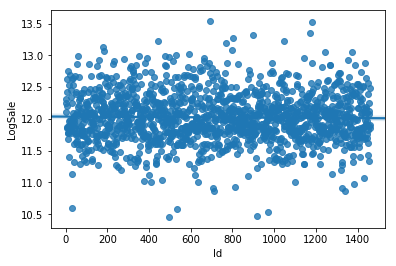

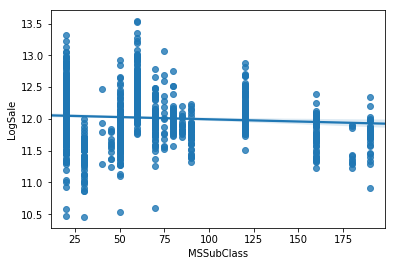

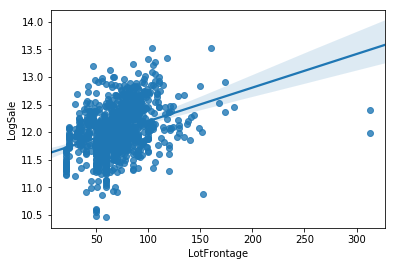

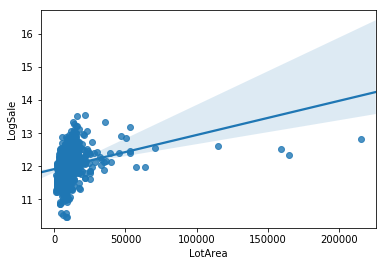

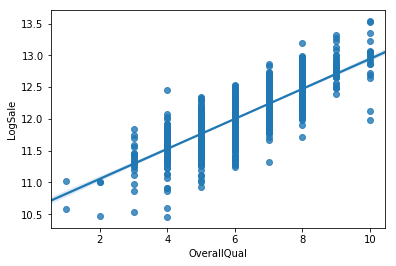

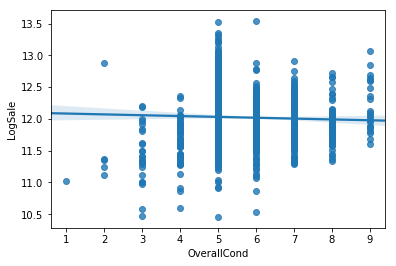

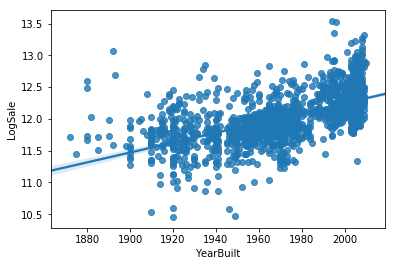

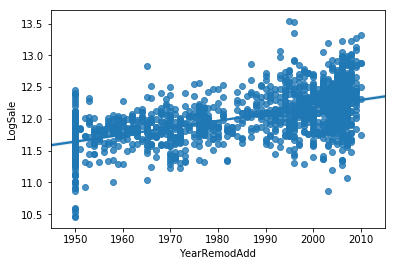

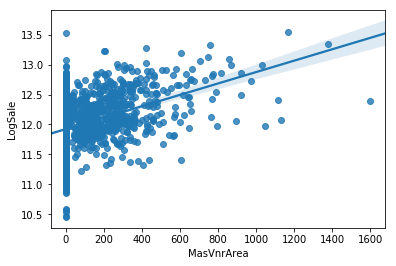

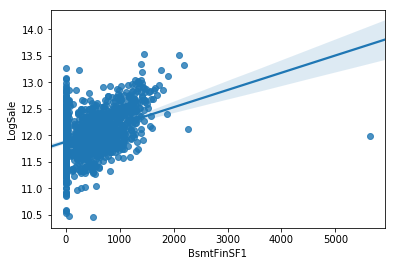

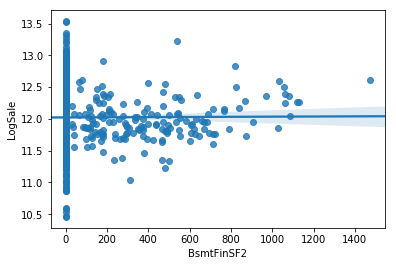

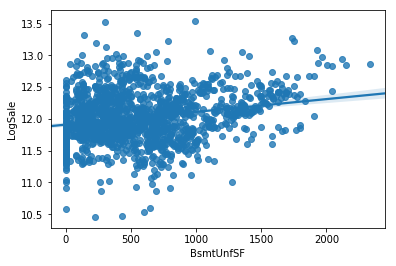

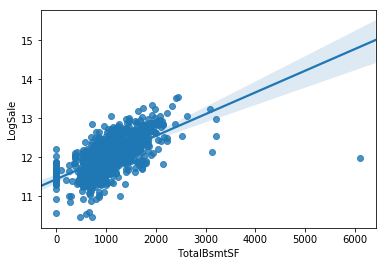

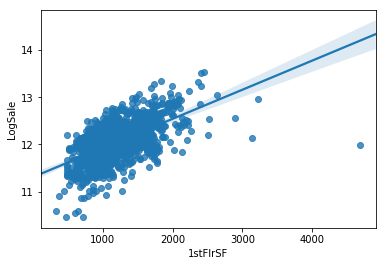

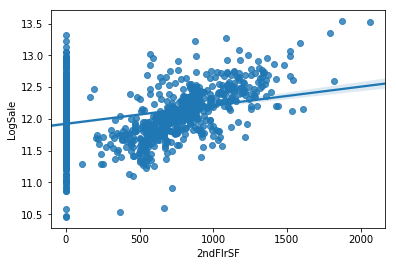

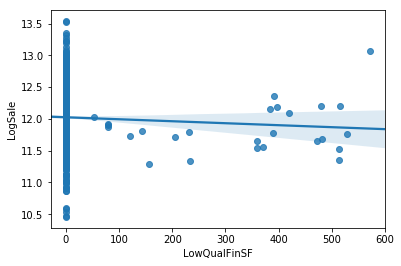

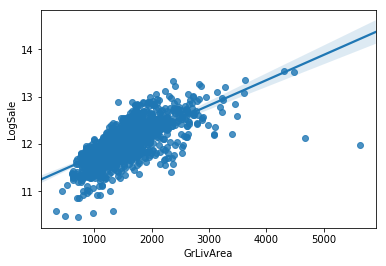

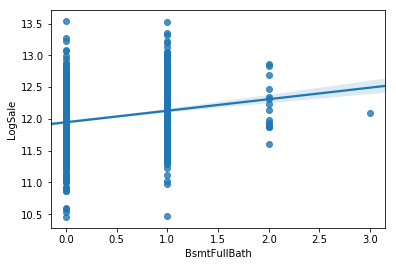

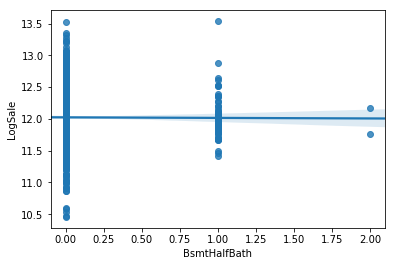

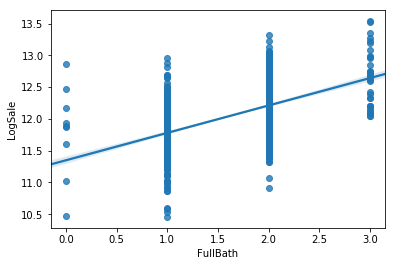

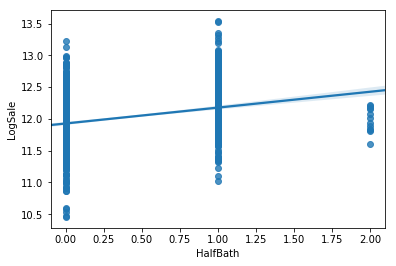

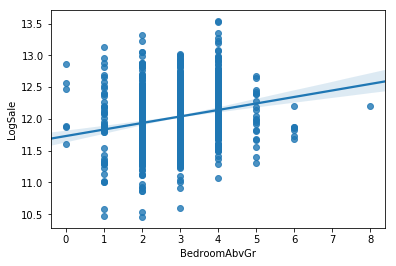

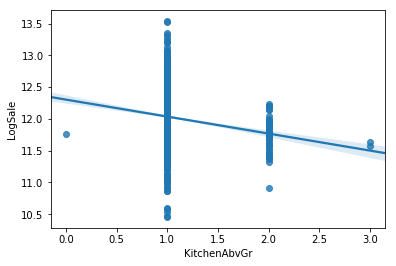

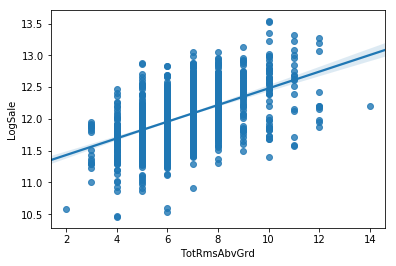

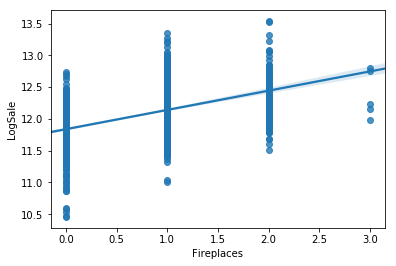

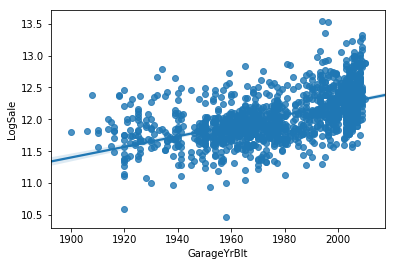

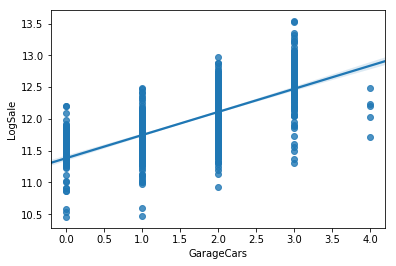

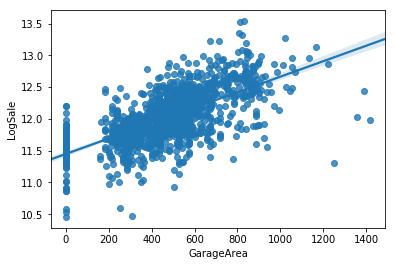

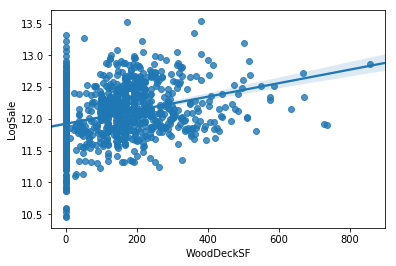

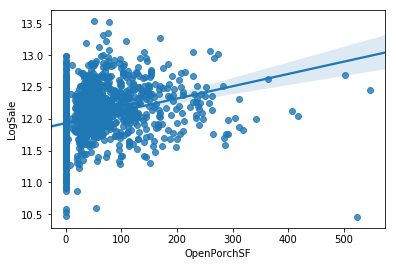

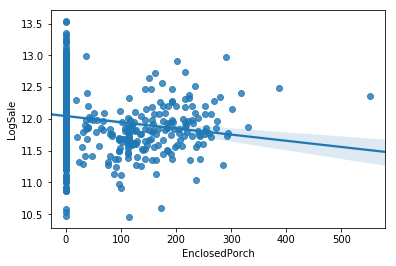

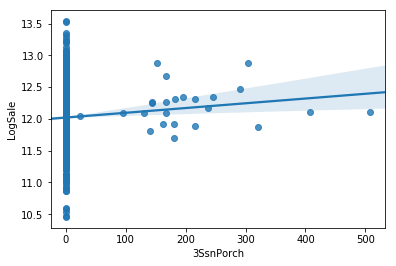

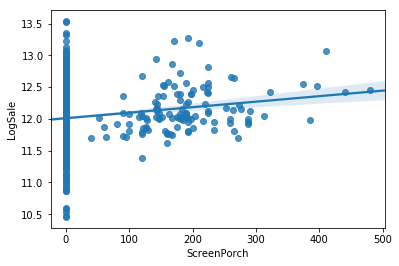

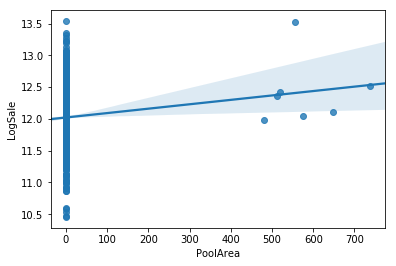

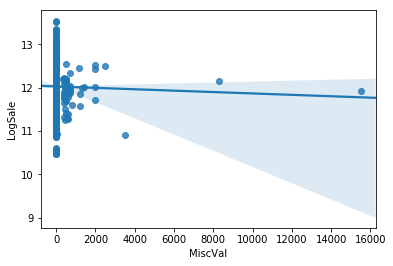

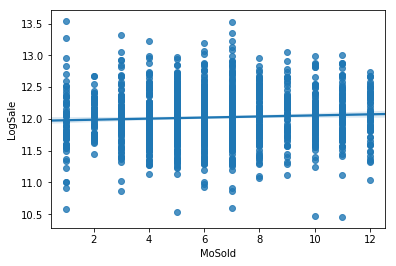

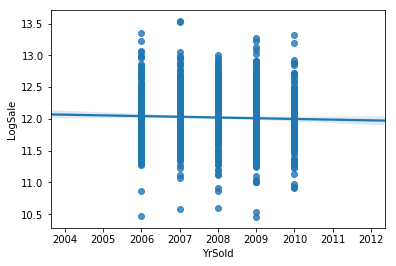

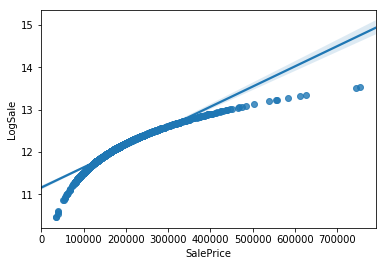

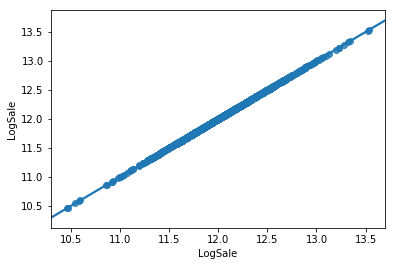

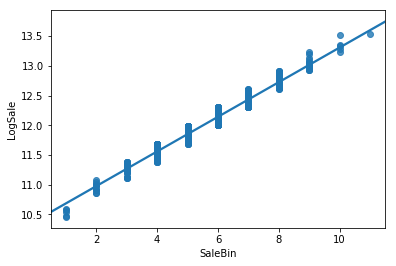

In [85]:
for col in dfInt.columns:
    plt.show(sns.regplot(x = dfInt[col], y = train.LogSale))

# elastic net for feature selection 

In [86]:
#Feature selection using Select from model 
# set up y
from sklearn.linear_model import ElasticNet

y = train.LogSale

# We use the base estimator Lasso since the L1 norm promotes sparsity of features.
elass = ElasticNet(alpha = 1.0, l1_ratio = .5, fit_intercept = True) #instantiating elastic net. 
#will need to set up a grid or boosting shenanegins to improve selections 


sfmEL = SelectFromModel(elass, threshold= 'mean')
sfmEL.fit(X, y)
n_features = sfmEL.transform(X).shape[1]

ENetFeatures = [X.columns[x] for x in sfmEL.get_support(indices=True)]
sfmEL

SelectFromModel(estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold='mean')

In [87]:
#create a function so I can more easily popout features for a given df

def ENFeatures(dataX, targetY, a, ratio, thresh):
    
    elass = ElasticNet(alpha = a, l1_ratio = ratio, fit_intercept = False)
    select = SelectFromModel(elass, threshold = thresh)
    select.fit(dataX, targetY)
    features = [dataX.columns[x] for x in select.get_support(indices = True)]
    return(features)


In [88]:
ENFeatures(X, y, 1, 0.5, 'mean')

['MSSubClass',
 'YearBuilt',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GarageArea',
 'WoodDeckSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [89]:
ENetFeatures # elasstic net still avoids categorical features. 

['MSSubClass',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea']

In [90]:
#get scores and coeff weights after performing fit with model 
elass.fit(X, y)
elass.score(X, y)
elass.coef_

array([ -8.58342260e-06,  -2.54329328e-04,   1.75050926e-06,
         0.00000000e+00,   0.00000000e+00,   2.85452242e-03,
         2.44393165e-03,   5.30602877e-05,   0.00000000e+00,
        -0.00000000e+00,   1.41004784e-04,   0.00000000e+00,
         2.50171322e-05,  -0.00000000e+00,   3.09882518e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         3.41137267e-04,   1.71633010e-04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   3.46373535e-04,
        -2.04994874e-04,  -2.36115615e-06,   0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,   0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
         0.00000000e+00,

# Let's Engineer some new features

In [91]:
# total sqft
TotalSF = X.TotalBsmtSF + X['1stFlrSF'] + X['2ndFlrSF']


correlation 0.805661826666


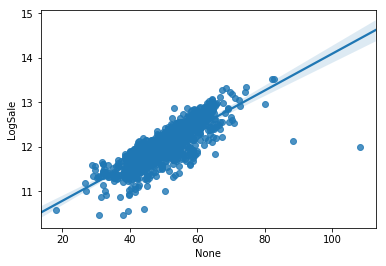

In [92]:
sns.regplot(x = TotalSF.apply(math.sqrt), y = y)
#plotting relationship between sqrt of total sf(linear ft) vs Log sale
print('correlation', y.corr(TotalSF.apply(math.sqrt)))


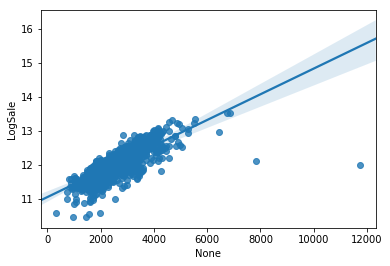

In [93]:
sns.regplot(x = TotalSF, y = y)
#plotting by SF seems like a worse fit--
y.corr(TotalSF)
print()

In [94]:
#let's make Total Linear feet a feature 
TotalLF = TotalSF.apply(math.sqrt)

In [95]:
#let's run some k-folds testing on a simple lin 
from sklearn.linear_model import LinearRegression 

X1 = pd.DataFrame(TotalLF)


CrossV = KFold(len(X1), n_folds = 10, shuffle = False) # setting up folding parameters
CrossV2 = KFold(len(X1), n_folds = 5, shuffle = False)

#set up simple linear regression 

LinR = LinearRegression(fit_intercept = True)


scores = cross_val_score(LinR, X1, y, cv = CrossV)

In [96]:
scores # just sqft alone doesn't do much for the score 

array([ 0.62211006,  0.72738943,  0.6992211 ,  0.62652843,  0.70733977,
        0.67502712,  0.65644608,  0.67171999,  0.31335536,  0.6727818 ])

In [97]:
scores.mean()

0.63719191382556273

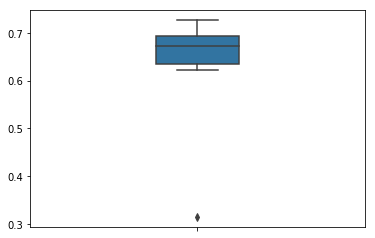

In [98]:
sns.boxplot(scores, orient = 'v', width = 0.25)

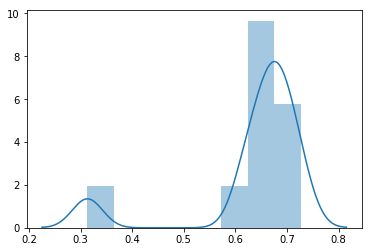

In [99]:
sns.distplot(scores)

In [100]:
#what is next feature that is of most importance? 
#year built and year remodled? neighborhood? 
# maybe we should rebuild df with new totLF feature and reselect features 

SFfactors = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']
newDF = X.drop(SFfactors, axis = 1)
newDF = newDF.drop(['Id'], axis = 1)

# I think we got all variables dependent on sq footage of house itself, maybe consider Lot area, and porch area, 

In [101]:
print(X.shape)
print(newDF.shape)

(1460, 210)
(1460, 205)


In [102]:
newDF['TotalLF'] = TotalLF

In [103]:
newDF.shape

(1460, 206)

In [104]:
#let's stick this new DF into an elasticnet / feature select and see what comes out 
#total LF starts showing up at lower alphas 
#lower alpha = less emphasis on precision more on accuracy?
cut = ENFeatures(newDF, y, 0.01, 0.8, .00005)
cut

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Foundation_CBlock',
 'HeatingQC_TA',
 'TotalLF']

In [105]:
elass = ElasticNet(alpha = .0005, l1_ratio = .35, fit_intercept = True)
elass.fit(newDF, y)
print(elass.score(newDF, y))

# passing through whole modified df gives us pretty high score .93, before tuning 
# parameters chosen by random fucking about with the alpha and mixing ratio 


0.934412948999


In [106]:
elass = ElasticNet(alpha = .0005, l1_ratio = .9, fit_intercept = True)
newDFCV = cross_val_score(elass, newDF, y, cv = CrossV2)
newDFCV

array([ 0.92947004,  0.89834139,  0.90548359,  0.91999271,  0.84642973])

In [107]:
newDFCV.mean()

0.89994349241275395

In [108]:
newCutDF = newDF[cut]
newCutDF.shape

(1460, 20)

In [109]:

elass.fit(newCutDF, y)
elass.score(newCutDF, y)

0.87598180890476318

# Normalize X df , otherwise elastic net will optimize strangely

In [110]:
X.OverallQual.corr(y)

0.81718441792168306

In [111]:
newDF.TotalLF.corr(y)

0.80566182666621999

In [112]:
newDF_norm = (newDF - newDF.mean()) / (newDF.max() - newDF.min())
X_norm = (X - X.mean())/(X.max() - X.min())
y_norm = (y - y.mean())/(y.max() - y.min())
y_norm

0       0.072748
1       0.027636
2       0.095346
3      -0.056812
4       0.131794
5      -0.049915
6       0.198603
7       0.059209
8      -0.081168
9      -0.112422
10     -0.082172
11      0.236563
12     -0.047648
13      0.168077
14     -0.019533
15     -0.075952
16     -0.036546
17     -0.200533
18     -0.015416
19     -0.059144
20      0.217437
21     -0.058209
22      0.104671
23     -0.081168
24     -0.025809
25      0.139890
26     -0.069124
27      0.197542
28      0.071184
29     -0.289328
          ...   
1430    0.046167
1431   -0.048214
1432   -0.308900
1433    0.036476
1434   -0.013376
1435    0.013909
1436   -0.105602
1437    0.280272
1438   -0.035021
1439    0.054293
1440    0.044231
1441   -0.035891
1442    0.201766
1443   -0.104255
1444    0.024213
1445   -0.083430
1446   -0.017674
1447    0.118515
1448   -0.129397
1449   -0.193384
1450   -0.066241
1451    0.176792
1452   -0.045397
1453   -0.221045
1454    0.033849
1455    0.015773
1456    0.075080
1457    0.1525

In [113]:
FeatCut = ENFeatures(newDF_norm, y_norm, 0.001, 0.5, .02)# when we normalize we get a lot more categorical variables !!!! 
FeatCut

['OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'KitchenQual_Ex',
 'SaleCondition_Abnorml',
 'TotalLF']

In [114]:
elass = ElasticNet(alpha = .00001, l1_ratio = 1, fit_intercept = True)
newDFCV = cross_val_score(elass, newDF_norm, y, cv = CrossV2)
newDFCV

array([ 0.92098514,  0.87838469,  0.87253383,  0.91429811,  0.83372171])

In [115]:
newDFCV.mean()

0.88398469635676624

In [116]:
#let's look at original X without condensed SQft 

elass = ElasticNet(alpha = .00000001, l1_ratio = .8, fit_intercept = True)
XCV = cross_val_score(elass, X_norm, y_norm, cv = CrossV2)
XCV

C:\Users\Gardenia\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gardenia\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gardenia\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Gardenia\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might wa

array([ 0.91564873,  0.85556347,  0.85250358,  0.91287999,  0.76015205])

In [117]:
XCV.mean() # we only have about 1% improvement by combining and introducing lin sqft 

0.85934956493603887

In [118]:
#lets try this again for variables selected from normalized df's 
def ENetScore(dataX, targetY, a, L1):
    #CrossV2 = KFold(len(dataX), n_folds = folds, shuffle = False)
    elass = ElasticNet(alpha = a, l1_ratio = L1, fit_intercept = True)
    CV = cross_val_score(elass, dataX, targetY, cv = CrossV2)
    return(CV.mean())

In [119]:
ENetScore(newDF_norm, y_norm, .0001, .5)

0.89206266918900357

In [120]:
elass = ElasticNet(alpha = .00005, l1_ratio = .5, fit_intercept = False)
elass.fit(X_norm, y_norm)
elass.score(X_norm, y_norm)

0.9367473827809043

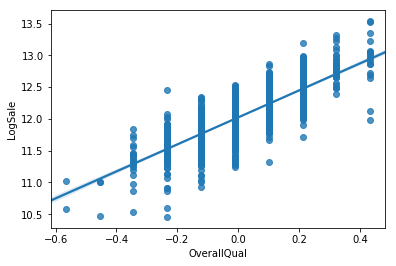

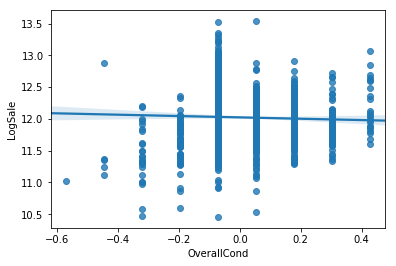

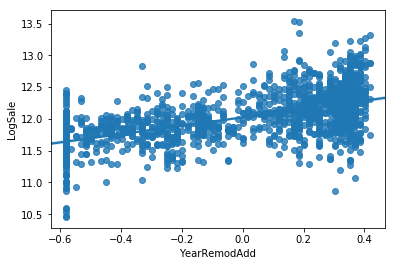

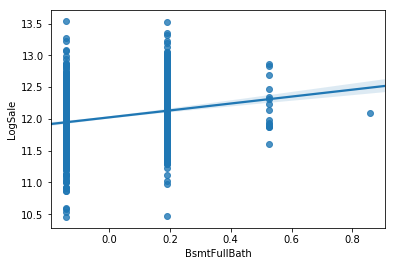

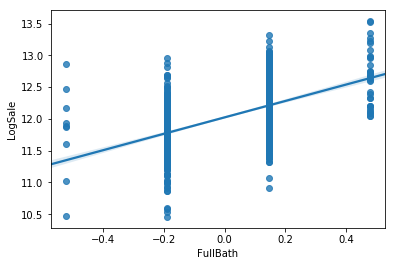

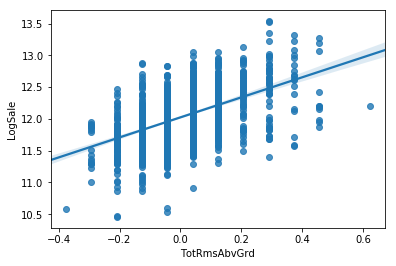

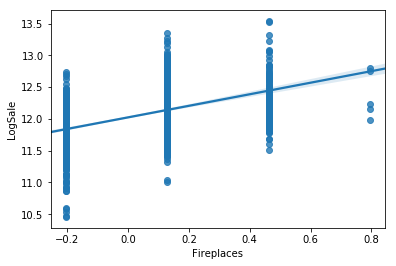

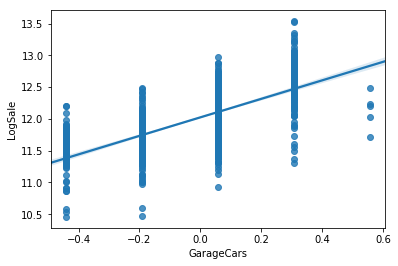

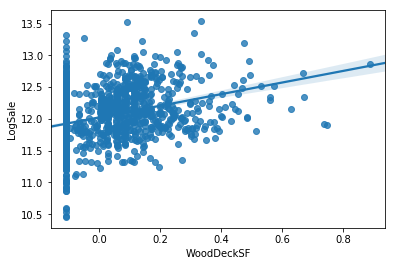

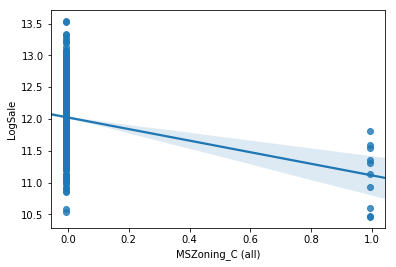

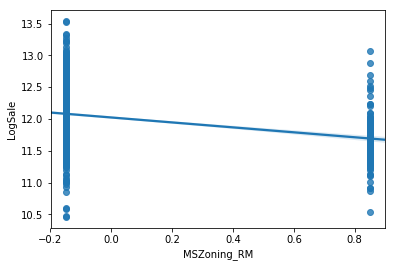

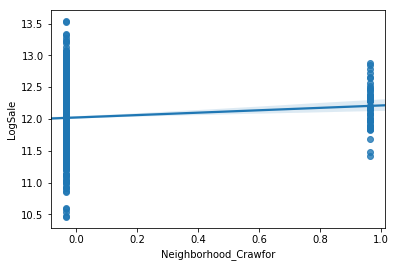

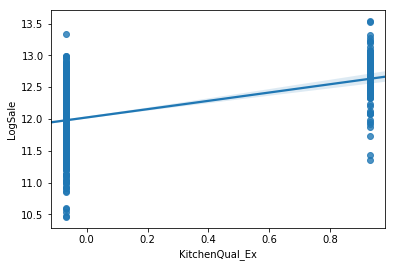

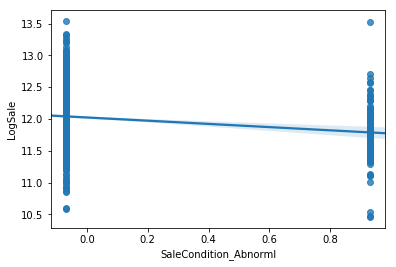

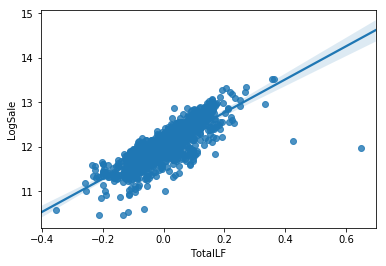

In [121]:
for each in FeatCut: 
    plt.show(sns.regplot(x = newDF_norm[each], y = y))

In [122]:
newDF_corr = newDF_norm.corr()

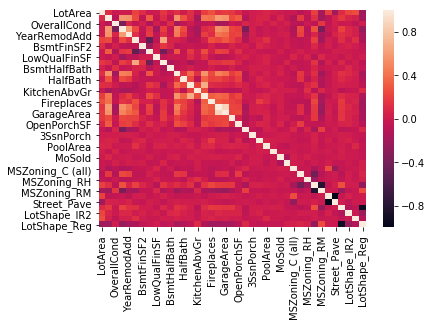

In [123]:
sns.heatmap(newDF_corr.iloc[1:40,1:40])

In [124]:
LinFoot_corr = list(map(lambda x: newDF_norm.TotalLF.corr(newDF_norm[x]), newDF_norm.columns))
LinFoot_corr = pd.DataFrame(LinFoot_corr, index = newDF_norm.columns)
LinFoot_corr.sort_values(0, ascending = False)

,0
TotalLF,1.000000
OverallQual,0.682739
TotRmsAbvGrd,0.681164
FullBath,0.588335
GarageArea,0.568327
GarageCars,0.554548
Fireplaces,0.483602
BsmtUnfSF,0.392970
BsmtFinSF1,0.385956
BedroomAbvGr,0.376395


In [125]:
from sklearn.linear_model import ElasticNetCV

In [126]:
ECV = ElasticNetCV(cv = 5)
ECV.fit(newDF_norm, y_norm)
ECV.score(newDF_norm,y_norm) 

0.92944514704600667

In [127]:
LCV = LassoCV(cv = 10).fit(newDF_norm, y_norm)
LCV.score(newDF_norm, y_norm)

0.92662660546447839

In [128]:
#print(ECV.alpha_, ECV.l1_ratio_, ECV.mse_path_)

In [129]:
math.log(.1)

-2.3025850929940455

In [130]:
from sklearn.linear_model import LassoLarsIC 

model_bic = LassoLarsIC(criterion = 'bic')
model_bic.fit(newDF_norm[FeatCut], y_norm)
alphas = model_bic.alphas_
criterion_ = model_bic.criterion_

model_aic = LassoLarsIC(criterion = 'aic')

C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


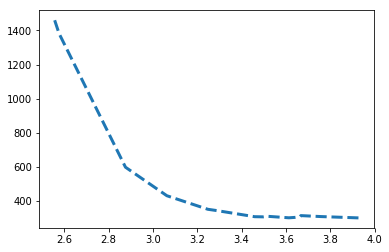

In [131]:
 plt.plot(-np.log10(alphas), criterion_, '--',
             linewidth=3)

In [132]:
def plot_ic_criterion(model, name, color):
    #alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    #plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                #label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

In [133]:
model = LassoCV(eps = 0.0001, cv = 5).fit(newDF_norm, y_norm)
n_log_alphas_ = -np.log10(model.alphas_)
n_log_alphas_

array([ 1.42529484,  1.46569888,  1.50610292,  1.54650696,  1.586911  ,
        1.62731504,  1.66771909,  1.70812313,  1.74852717,  1.78893121,
        1.82933525,  1.86973929,  1.91014333,  1.95054737,  1.99095141,
        2.03135545,  2.07175949,  2.11216353,  2.15256757,  2.19297161,
        2.23337565,  2.27377969,  2.31418373,  2.35458777,  2.39499181,
        2.43539585,  2.47579989,  2.51620393,  2.55660797,  2.59701201,
        2.63741605,  2.6778201 ,  2.71822414,  2.75862818,  2.79903222,
        2.83943626,  2.8798403 ,  2.92024434,  2.96064838,  3.00105242,
        3.04145646,  3.0818605 ,  3.12226454,  3.16266858,  3.20307262,
        3.24347666,  3.2838807 ,  3.32428474,  3.36468878,  3.40509282,
        3.44549686,  3.4859009 ,  3.52630494,  3.56670898,  3.60711302,
        3.64751706,  3.68792111,  3.72832515,  3.76872919,  3.80913323,
        3.84953727,  3.88994131,  3.93034535,  3.97074939,  4.01115343,
        4.05155747,  4.09196151,  4.13236555,  4.17276959,  4.21

<function matplotlib.pyplot.show>

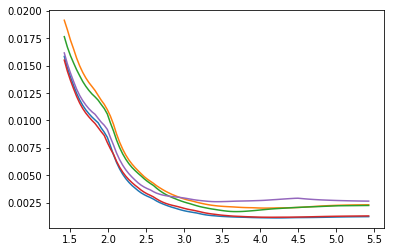

In [134]:
plt.plot(n_log_alphas_, model.mse_path_)
plt.show

In [135]:
# Trying to use clustering techniques to create 'nodes' to lin regress on 
dfCatDum = pd.get_dummies(dfStr)
dfCatDum.shape

(1460, 253)

In [136]:
from sklearn.cluster import KMeans


In [137]:
kmeans = KMeans(n_clusters =8)
kmeans.fit(dfCatDum)
labels = kmeans.labels_
kmeans.score(dfCatDum)

-16772.205644397174

In [138]:
cluster1 = kmeans.cluster_centers_
cluster1.shape
kmeans.cluster_centers_[4]

array([  4.73540856e+00,   3.89105058e-03,   1.16731518e-02,
         2.33463035e-02,   8.28793774e-01,   1.32295720e-01,
         3.89105058e-03,   9.96108949e-01,   7.78210117e-03,
         1.16731518e-02,   2.49027237e-01,   1.55642023e-02,
        -2.34187669e-17,   7.35408560e-01,   5.05836576e-02,
         2.72373541e-02,   3.11284047e-02,   8.91050584e-01,
         1.00000000e+00,   2.16840434e-18,   1.90661479e-01,
         3.89105058e-02,   3.50194553e-02,   8.67361738e-18,
         7.35408560e-01,   9.33852140e-01,   6.22568093e-02,
         3.89105058e-03,  -5.55111512e-17,   7.78210117e-03,
         5.83657588e-02,   1.55642023e-02,   7.78210117e-03,
         9.72762646e-02,   1.16731518e-02,   1.05058366e-01,
         3.89105058e-03,   1.16731518e-02,   2.33463035e-02,
         9.33852140e-02,   2.84046693e-01,   3.50194553e-02,
         1.94552529e-02,   6.93889390e-17,   6.93889390e-17,
         3.89105058e-02,  -3.46944695e-18,   1.20622568e-01,
         5.05836576e-02,

IndexError: index 8 is out of bounds for axis 0 with size 8

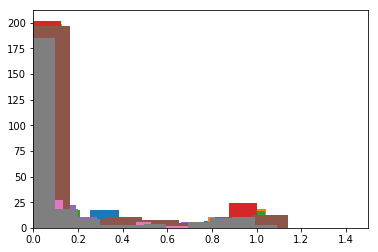

In [139]:
for n in range(1,len(kmeans.cluster_centers_[0])):
    cluster = kmeans.cluster_centers_[n-1]
    plt.hist(cluster, bins = 50)
    plt.xlim(0, 1.5)

In [140]:
#ok we have 4 classes. don't know what it's being classified by how do we look? 
labels = pd.DataFrame(labels, columns = ['class'])

In [141]:
dfStr['group'] = labels
dfStr.columns


C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SaleBin', 'group'],
      dtype='object')

In [142]:
#let's modify num only df again
#start with our int only df
#total LF
dfInt['TotalLF'] = TotalLF
dfInt = dfInt.drop(SFfactors, axis = 1)

C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [143]:
dfInt['group'] = labels

In [144]:
# we've set up 4 groups, let's get some lin regress scores 
#first we split x and y's again 

y = dfInt.SalePrice.apply(math.log10)
dfInt = dfInt.drop('SalePrice', axis = 1)

In [145]:
target = pd.DataFrame(y)
data = dfInt

In [146]:
target['group'] = labels
data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'LogSale',
       'SaleBin', 'TotalLF', 'group'],
      dtype='object')

In [147]:
from sklearn.linear_model import Lasso

def splitTest(group):
    X = data[data.group.isin(group)]
    X = X.drop('group', axis = 1)
    y = target[target.group.isin(group)]
    y = y.drop('group', axis = 1)
    lasso = Lasso(alpha = .00001, normalize = True)
    lasso.fit(X, y)
    return(lasso.score(X, y))
    

In [148]:
#errors from Nan's. impute all the Nan's
#fuck it just items with Nan's for now
#dfInt = dfInt.drop(['LotFrontage', 'GarageYrBlt'], axis = 1)

In [149]:
data = data.drop(['LotFrontage','GarageYrBlt','MasVnrArea'], axis = 1)

In [150]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LogSale', 'SaleBin', 'TotalLF', 'group'],
      dtype='object')

In [151]:
data = data.drop(['LogSale','SaleBin'], axis = 1)

In [152]:
data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'TotalLF', 'group'],
      dtype='object')

In [153]:
splitTest([3])

0.87705925591507428

In [154]:
set(data.group)
y.group = labels
list(range(0,5))

[0, 1, 2, 3, 4]

In [155]:
#creating a function that combines a k-means classifier and passes those along to a lin regression model 
from sklearn.linear_model import LinearRegression

def twoLayer(n_nodes, dataCat, dataNum, target):
    #firstlayer: k-means classifier groups into different nodes 
    dummies = pd.get_dummies(dataCat)
    kmeans = KMeans(n_clusters = n_nodes, random_state = 10)
    kmeans.fit(dummies)
    labels = kmeans.labels_
    #connection: modifying numeric dataframe with new groups
    
    dataNum['group'] = labels
    target['group'] = labels
    #set up Lin regressor 
    lin = LinearRegression()
    # doing lasso and giving score for each group
    for n in range(0, n_nodes):
        X = dataNum[dataNum['group'] == n]
        X = X.drop('group', axis = 1)
        y = target[target['group'] == n]
        y = y.drop('group', axis = 1)
        
        lin.fit(X,y)
        print(lin.score(X,y))
    
    
    
    
    
    

In [156]:
dfStr.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SaleBin', 'group'],
      dtype='object')

In [157]:

selectCat = dfStr[['Neighborhood', 'CentralAir', 'KitchenQual', 'SaleCondition']]

In [158]:
from sklearn.preprocessing import LabelEncoder
selectCat.shape
selectCatDum = pd.get_dummies(selectCat)


In [159]:
le = LabelEncoder()
selectCatLE = selectCat.apply(le.fit_transform)

In [160]:
selectCatDum.sum()

Neighborhood_Blmngtn       17
Neighborhood_Blueste        2
Neighborhood_BrDale        16
Neighborhood_BrkSide       58
Neighborhood_ClearCr       28
Neighborhood_CollgCr      150
Neighborhood_Crawfor       51
Neighborhood_Edwards      100
Neighborhood_Gilbert       79
Neighborhood_IDOTRR        37
Neighborhood_MeadowV       17
Neighborhood_Mitchel       49
Neighborhood_NAmes        225
Neighborhood_NPkVill        9
Neighborhood_NWAmes        73
Neighborhood_NoRidge       41
Neighborhood_NridgHt       77
Neighborhood_OldTown      113
Neighborhood_SWISU         25
Neighborhood_Sawyer        74
Neighborhood_SawyerW       59
Neighborhood_Somerst       86
Neighborhood_StoneBr       25
Neighborhood_Timber        38
Neighborhood_Veenker       11
CentralAir_N               95
CentralAir_Y             1365
KitchenQual_Ex            100
KitchenQual_Fa             39
KitchenQual_Gd            586
KitchenQual_TA            735
SaleCondition_Abnorml     101
SaleCondition_AdjLand       4
SaleCondit

In [161]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(selectCatLE)
labels = kmeans.labels_
kmeans.score(selectCatLE)

-6214.2468700690561

In [169]:
twoLayer(4, selectCat, data, target)
#ok this gives... something
#clustering is not great I think we can work on it to at least get consistency 
y

0.923968574375
0.784043031809
0.838417970426
0.814599548707


0       5.319106
1       5.258877
2       5.349278
3       5.146128
4       5.397940
5       5.155336
6       5.487138
7       5.301030
8       5.113609
9       5.071882
10      5.112270
11      5.537819
12      5.158362
13      5.446382
14      5.195900
15      5.120574
16      5.173186
17      4.954243
18      5.201397
19      5.143015
20      5.512284
21      5.144263
22      5.361728
23      5.113609
24      5.187521
25      5.408749
26      5.129690
27      5.485721
28      5.317018
29      4.835691
          ...   
1430    5.283618
1431    5.157608
1432    4.809560
1433    5.270679
1434    5.204120
1435    5.240549
1436    5.080987
1437    5.596176
1438    5.175222
1439    5.294466
1440    5.281033
1441    5.174060
1442    5.491362
1443    5.082785
1444    5.254306
1445    5.110590
1446    5.198382
1447    5.380211
1448    5.049218
1449    4.963788
1450    5.133539
1451    5.458018
1452    5.161368
1453    4.926857
1454    5.267172
1455    5.243038
1456    5.322219
1457    5.4256

In [163]:
selectCatTest[selectCatTest.group == 1]

NameError: name 'selectCatTest' is not defined

In [174]:
target.iloc[:,0]

0       5.319106
1       5.258877
2       5.349278
3       5.146128
4       5.397940
5       5.155336
6       5.487138
7       5.301030
8       5.113609
9       5.071882
10      5.112270
11      5.537819
12      5.158362
13      5.446382
14      5.195900
15      5.120574
16      5.173186
17      4.954243
18      5.201397
19      5.143015
20      5.512284
21      5.144263
22      5.361728
23      5.113609
24      5.187521
25      5.408749
26      5.129690
27      5.485721
28      5.317018
29      4.835691
          ...   
1430    5.283618
1431    5.157608
1432    4.809560
1433    5.270679
1434    5.204120
1435    5.240549
1436    5.080987
1437    5.596176
1438    5.175222
1439    5.294466
1440    5.281033
1441    5.174060
1442    5.491362
1443    5.082785
1444    5.254306
1445    5.110590
1446    5.198382
1447    5.380211
1448    5.049218
1449    4.963788
1450    5.133539
1451    5.458018
1452    5.161368
1453    4.926857
1454    5.267172
1455    5.243038
1456    5.322219
1457    5.4256